<a href="https://colab.research.google.com/github/PerttiP/ML-Project-in-Automated-Software-Engineering/blob/main/PerttiTrainingModel3_RandomForest_24features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PerttiTrainingModel3_RandomForest_24features
Google Colab version
-------------------------------
IMPORTANT PRE-REQUISITE:
Please first prepare Pandas dataframe by running PerttiPrepareData24features.ipynb
which will create the input file PrepDataframe24features.csv
------------------------------------------------------------------------------
Test run options:
OPT1. Enable Data augmentation.
OPT2. Enable resampling with SMOTE.

Updates:
UPD1. With extended data feature "absolute code churn measure" : code_churn.
UPD2. With feature selection (Removed redundant data).
'''

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # visualization
import matplotlib.pyplot as plt

THIS TEST IS RESAMPLING DATA TO AVOID IMBALANCED DATA!!!

This DNN Model is using SMOTE as a resampling technique.

Using Keras API with TensorFlow backend.

In [ ]:
# Install & Import imbalanced-learn library
!pip install -q scikit-learn imblearn

import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
# Utility functions
def print_sample(x, num_rows = 20):
    # Display a random sample in <x> of <num_rows> rows
    sample = x.sample(num_rows)
    pd.set_option('display.max_rows', len(sample))
    print('--------------------------')
    print(sample)
    pd.reset_option('display.max_rows')

In [ ]:
# Mount my Google Drive into Colab
# from google.colab import drive
# FIXME: MessageError: Error: credential propagation was unsuccessful
# SKIP THIS FOR NOW!
# drive.mount('/content/drive')

from pathlib import Path
current_work_directory = Path.cwd()
print("The current working directory is:", current_work_directory)
print(Path().absolute())

The current working directory is: /content
/content


In [ ]:
# Upload file to Colab
# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import files
uploaded = files.upload()

Saving PrepDataframe24features.csv to PrepDataframe24features.csv


In [ ]:
# NOTE: Need to first upload pre-processed data file to Colab, See step 'Upload file to Colab' above!
# WARN: For unknown reason the uploaded file name sometimes get an extra id like (1)
import io
df = pd.read_csv(io.BytesIO(uploaded['PrepDataframe24features.csv']))
# df = pd.read_csv(io.BytesIO(uploaded['PrepDataframe.csv']))

# Works only for Anaconda:
# df = pd.read_csv('PrepDataframe.csv')

# Make sure we have values everywhere
print(df.isnull().sum().max())

# Make sure that column isbuggy is an integer!
df['isbuggy'] = df['isbuggy'].astype(int)
# print('------- df.dtypes:')
# print(df.dtypes)

0


In [ ]:
# OPT1. Data augmentation to increase the size of the dataset
# -----------------------------------------------------------
# WAS DISABLED for RandomForest with 29 features FIRST TEST
# ALSO WAS DISABLED for RandomForest with 24 features SECOND TEST
'''
for i in range(1,5): # Range changed back to 1,5
   df = df._append(df) # append is deprecated in newer Pandas
'''

In [ ]:
print(df.shape)

# Supervised Learning: include target (isbuggy) in training data
X = df
Y = df['isbuggy']
# print(Y)

# 2. Split into training data (70%) and test data (30%)
#    TODO: Split also into validation data?
trainSize = int(df.shape[0] * 0.70)

# ALTERNATIVE: Split using method from sklearn.model_selection
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

trainX = X.iloc[0: trainSize, :]
trainY = Y[0: trainSize]

testX = X.iloc[trainSize: , :]
testY = Y[trainSize: ]

print("---------------- train dimensions:")
print(trainX.shape, trainY.shape)
print("---------------- test dimensions:")
print(testX.shape, testY.shape)

(26383, 24)
---------------- train dimensions:
(18468, 24) (18468,)
---------------- test dimensions:
(7915, 24) (7915,)


In [ ]:
# OPT2. Oversampling of training data using SMOTE
# -----------------------------------------------

# Print class distribution counters, to see how imbalanced the dataset is
from collections import Counter
counter = Counter(trainY)

# WAS DISABLED for RandomForest with 29 features FIRST TEST
# ALSO WAS DISABLED for RandomForest with 24 features SECOND TEST
'''
print('Distribution counters BEFORE SMOTE oversampling:')
print(counter)

from imblearn.over_sampling import SMOTE
trainXsmote, trainYsmote = SMOTE().fit_resample(trainX, trainY)

# Replace training data with oversampled data:
trainX = trainXsmote
trainY = trainYsmote

counter = Counter(trainYsmote)
print('Distribution counters AFTER SMOTE oversampling:')
print(counter)
'''

"\nprint('Distribution counters BEFORE SMOTE oversampling:')\nprint(counter)\nfrom imblearn.over_sampling import SMOTE\ntrainXsmote, trainYsmote = SMOTE().fit_resample(trainX, trainY)\n# Replace training data with oversampled data:\ntrainX = trainXsmote\ntrainY = trainYsmote\n\ncounter = Counter(trainYsmote)\nprint('Distribution counters AFTER SMOTE oversampling:')\nprint(counter)\n"

In [ ]:
# Data Transforms
# https://scikit-learn.org/stable/data_transforms.html

# Similar to the z-score method but involving simpler computation is the max-min method that
# computes the normalized feature value

# Normalization Step
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Perform fit only on training data!
trainX = scaler.fit_transform(trainX.values)
print(trainX)

print('trainX.mean():')
print(trainX.mean())
print('trainX.std():')
print(trainX.std())

# Apply same transformation to test data (but do not use fit)!
testX = scaler.transform(testX.values)
print(testX)

print('testX.mean():')
print(testX.mean())
print('testX.std():')
print(testX.std())

[[-0.05696481 -0.06903405 -0.05617537 ...  0.57413061 -0.41649189
  -0.07291617]
 [-0.05782023 -0.08635211 -0.11965495 ...  0.44531472 -0.41649189
  -0.07728661]
 [-0.0526877  -0.06903405 -0.05617537 ... -0.47133989 -0.41649189
  -0.07204208]
 ...
 [-0.05782023 -0.08635211 -0.11965495 ... -0.56100057 -0.41649189
  -0.07947182]
 [-0.05696481 -0.08635211 -0.11965495 ... -1.14009347 -0.41649189
  -0.07947182]
 [-0.05097685 -0.06903405 -0.11965495 ... -1.09118235 -0.41649189
  -0.07116799]]
trainX.mean():
1.084493359553705e-17
trainX.std():
0.978945010372561
[[-0.05525396 -0.08635211 -0.11965495 ... -1.09746864 -0.41649189
  -0.07029391]
 [-0.05782023 -0.06903405 -0.05617537 ... -0.87950517 -0.41649189
  -0.07903478]
 [-0.05782023 -0.06903405 -0.11965495 ... -0.56601218 -0.41649189
  -0.02484137]
 ...
 [-0.0526877  -0.05171599  0.00730421 ...  2.22816335 -0.41649189
  -0.07379026]
 [-0.05696481 -0.06903405 -0.11965495 ... -0.91475066 -0.41649189
  -0.07553843]
 [-0.05696481 -0.06903405 -0.

In [ ]:
# Import keras like this?:
# REF: https://machinelearningmastery.com/three-ways-to-build-machine-learning-models-in-keras/
from tensorflow import keras

# For Keras version 3 only? -> https://keras.io/guides/migrating_to_keras_3/
# Or import keras like this, configuring the backend?:
# REF: https://keras.io/getting_started/
'''
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
'''

# To keep using Keras version 2? -> https://blog.tensorflow.org/2024/03/whats-new-in-tensorflow-216.html
# os.environ['TF_USE_LEGACY_KERAS'] = '1'

from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation

# How many features do we have?
print('trainX.shape[1:]: ', trainX.shape[1:])

# ATTEMPT THREE
# Build a RandomForest classifier
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100, random_state=5)
clf = RandomForestClassifier(
    n_estimators=300, # The number of trees in the forest
    random_state=42,  # Use randomization
    n_jobs=-1) # number of jobs to run in parallel, -1 means using all processors

# Train the model
model = clf.fit(trainX, trainY)

# Visualize the Decision Tree classifier model
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

# Extract single tree
estimator = model.estimators_[5]

print(estimator)

# Export tree as dot file
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
from sklearn.tree import export_graphviz
export_graphviz(estimator,
    out_file='tree.dot',
    feature_names = None, # trainX.feature_names,
    class_names = None, # trainX.target_names,
    rounded = True,
    proportion = False,
    precision = 2,
    filled = True,
    max_depth = 7) # limit maximum depth in tree when a lot of features

# Convert dot to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

trainX.shape[1:]:  (24,)
DecisionTreeClassifier(max_features='sqrt', random_state=1201263687)


---------- predictedY: 
[0 0 0 ... 0 0 0]
---------- probA: 
[0.01       0.         0.02333333 ... 0.01       0.01       0.00333333]
---------- Confusion Matrix:
[[6903    0]
 [   0 1012]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC AUC: 1.0
ROC AUC score: 1.0


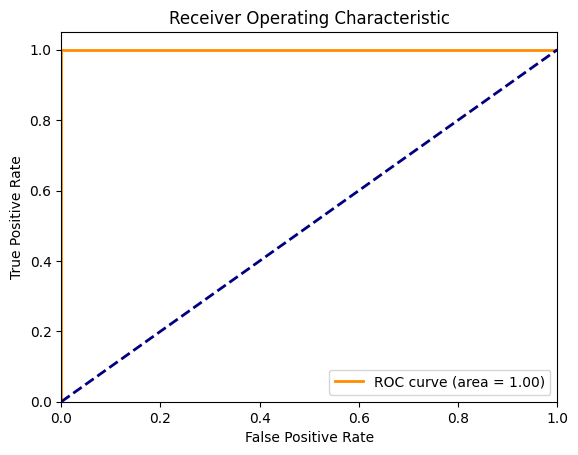

In [ ]:
# Make prediction of target Y using test data in X
predictedY = model.predict(testX)
print('---------- predictedY: ')
head(predictedY)
# print_sample(predictedY, 100)

# Predict class probabilities for test data in X
probA = clf.predict_proba(testX)[:,1]
print('---------- probA: ')
print(probA)

# FIXME:
# Use Scikit-Learn for evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(testY, predictedY)
# Accuracy
accuracy = accuracy_score(testY, predictedY)
# Precision
precision = precision_score(testY, predictedY)
# Recall
recall = recall_score(testY, predictedY)
# F1-Score
f1 = f1_score(testY, predictedY)

# Also construct a ROC curve (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(testY, predictedY)
# Compute the ROC AUC, a measure of the model’s capability to distinguish between positive and negative classes
roc_auc = auc(fpr, tpr) # FPR = False Positive Rate, TPR = True Positive Rate

print("---------- Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# Calculate ROC-AUC score
from sklearn.metrics import roc_auc_score
print("ROC AUC score:", roc_auc_score(testY, predictedY))


def plotROC(fpr, tpr, roc_auc):

  # Plot ROC curve
  plt.figure()

  # Plot the ROC curve with a label displaying the ROC AUC score
  plt.plot(fpr, tpr, color='darkorange', lw=2,
          label='ROC curve (area = %0.2f)' % roc_auc)

  # Plot a dashed diagonal line for reference
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

  # Set the x and y-axis limits
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  # Label the x and y-axes
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  # Set the title of the plot
  plt.title('Receiver Operating Characteristic')

  # Add a legend to the plot
  plt.legend(loc='lower right')

  # Display the ROC curve plot
  plt.show()

plotROC(fpr, tpr, roc_auc)

In [ ]:
# QUESTION: Is model.evaluate possible for RandomForest using scikit-learn???
# ANSWER: NO!: AttributeError: 'RandomForestClassifier' object has no attribute 'evaluate'
# train_eval_metrics = model.evaluate(trainX, trainY, batch_size=128)

# TODO:
# Can we calculate training loss and accuracy, but it seems to be a perfect model, so accuracy is 1.0 and loss is 0.0 ?
'''
print('Train loss: ')
print(train_loss)
print('Train accuracy: ')
print(train_accuracy)
'''

print('---------- predictedY: ')

head = 100
tail = len(predictedY) -100
print(predictedY[:head])
print(predictedY[tail:])

---------- predictedY: 
[0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
